# # 모두의 파이썬 데이터분석 - 3
자료 출처: https://pay.tmoney.co.kr/index.dev - 이용안내 - 이용안내 - 대중교통 통계자료

## 4. 대중교통 공공데이터
### 1) 대중교통 데이터 시각화하기
#### (1) 데이터 정제하기

In [6]:
import csv

f = open('subwayfee.csv')
data = csv.reader(f)
next(data)
count = 0

for row in data:
    print(row)
    count += 1
    if count == 5:
        break

['사용월', '호선명', '역ID', '지하철역', '유임승차', '유임하차', '무임승차', '무임하차']
['2019-01', '1호선', '0150', '서울역', '1516452', '1400464', '221180', '211764']
['2019-01', '1호선', '0151', '시청', '676932', '676266', '102388', '101033']
['2019-01', '1호선', '0152', '종각', '1240810', '1177643', '162410', '152062']
['2019-01', '1호선', '0153', '종로3가', '703110', '674148', '387062', '362735']


In [7]:
import csv

f = open('subwayfee.csv')
data = csv.reader(f)
next(data)
count = 0

for row in data:
    for i in range(4, 8):
        row[i] = int(row[i]) # 필요한 데이터를 정수로 변환
    print(row)
    count += 1
    if count == 5:
        break

['2019-01', '1호선', '0150', '서울역', 1516452, 1400464, 221180, 211764]
['2019-01', '1호선', '0151', '시청', 676932, 676266, 102388, 101033]
['2019-01', '1호선', '0152', '종각', 1240810, 1177643, 162410, 152062]
['2019-01', '1호선', '0153', '종로3가', 703110, 674148, 387062, 362735]
['2019-01', '1호선', '0154', '종로5가', 571824, 583955, 275447, 263687]


#### (2) 유임 승차 비율이 가장 높은 역은 어디일까?

In [9]:
# rate = 유임승차인원 / 무임승차인원

import csv

f = open('subwayfee.csv')
data = csv.reader(f)
next(data)
count = 0
mx = 0
rate = 0

for row in data:
    for i in range(4, 8):
        row[i] = int(row[i]) # 필요한 데이터를 정수로 변환
    rate = row[4] / row[6]
    if rate > mx : 
        mx = rate

print(mx)

ZeroDivisionError: division by zero

위 코드는 ZeroDivisionError: division by zero 에러가 발생한다. 이유는 row[6]값이 0인 역들이 있기 때문. 간단히 예외 처리를 하고 진행한다.

In [14]:
# rate = 유임승차인원 / 무임승차인원

import csv

f = open('subwayfee.csv')
data = csv.reader(f)
next(data)
count = 0
mx = 0
rate = 0

for row in data:
    for i in range(4, 8):
        row[i] = int(row[i]) # 필요한 데이터를 정수로 변환
    if row[6] != 0 :
        rate = row[4]/row[6]
    if rate > mx : 
        mx = rate
        print(row, round(rate, 2))

['2019-01', '1호선', '0150', '서울역', 1516452, 1400464, 221180, 211764] 6.86
['2019-01', '1호선', '0152', '종각', 1240810, 1177643, 162410, 152062] 7.64
['2019-01', '2호선', '0201', '시청', 706097, 679503, 61058, 55387] 11.56
['2019-01', '2호선', '0202', '을지로입구', 1415414, 1414980, 120425, 111592] 11.75
['2019-01', '2호선', '0209', '한양대', 233785, 256079, 15380, 16652] 15.2
['2019-01', '2호선', '0222', '강남', 3153418, 3210437, 186486, 167666] 16.91
['2019-01', '2호선', '0239', '홍대입구', 2351935, 2507561, 114832, 111488] 20.48
['2019-01', '3호선', '0321', '충무로', 55, 0, 2, 0] 27.5


위 결과를 보면 충무로 값이 이상하다. 3호선과 4호선이 환승 가능한 역으로 두 가지 데이터를 다 처리해 주어야 하기 때문.<br>
    ['2019-01', '3호선', '0321', '충무로', 55, 0, 2, 0]<br><br>
10만명 이상인 역만 출력하는 것으로 하고 비율 계산 방식을 바꾼다.<br>
rate = 유임 승차 인원 / 전체(유임+무임)인원

In [15]:
# rate = 유임승차인원 / 무임승차인원

import csv

f = open('subwayfee.csv')
data = csv.reader(f)
next(data)
mx = 0
rate = 0

for row in data:
    for i in range(4, 8):
        row[i] = int(row[i]) # 필요한 데이터를 정수로 변환
    if row[6] != 0 and (row[4]+row[6]) > 100000 :
        rate = row[4]/(row[4]+row[6])
    if rate > mx : 
        mx = rate
        print(row, round(rate, 2))

['2019-01', '1호선', '0150', '서울역', 1516452, 1400464, 221180, 211764] 0.87
['2019-01', '1호선', '0152', '종각', 1240810, 1177643, 162410, 152062] 0.88
['2019-01', '2호선', '0201', '시청', 706097, 679503, 61058, 55387] 0.92
['2019-01', '2호선', '0202', '을지로입구', 1415414, 1414980, 120425, 111592] 0.92
['2019-01', '2호선', '0209', '한양대', 233785, 256079, 15380, 16652] 0.94
['2019-01', '2호선', '0222', '강남', 3153418, 3210437, 186486, 167666] 0.94
['2019-01', '2호선', '0239', '홍대입구', 2351935, 2507561, 114832, 111488] 0.95


해당 코드만 보면 유임승차 비율이 높은 것은 홍대입구 밖에 없는 것으로 보이지만 특정 값을 주어 비율이 높은 역을 본다.

In [16]:
import csv

f = open('subwayfee.csv')
data = csv.reader(f)
next(data)
mx = 0
rate = 0

for row in data:
    for i in range(4, 8):
        row[i] = int(row[i]) # 필요한 데이터를 정수로 변환
    if row[6] != 0 and (row[4]+row[6]) > 100000 :
        rate = row[4]/(row[4]+row[6])
    if rate > 0.94 : 
        mx = rate
        print(row, round(rate, 2))

['2019-01', '2호선', '0222', '강남', 3153418, 3210437, 186486, 167666] 0.94
['2019-01', '2호선', '0239', '홍대입구', 2351935, 2507561, 114832, 111488] 0.95
['2019-01', '경부선', '1001', '서울역', 178223, 29980, 10325, 1612] 0.95
['2019-01', '9호선', '4125', '신논현', 965930, 995451, 57013, 54557] 0.94
['2019-01', '공항철도 1호선', '4203', '홍대입구', 336328, 335507, 17545, 17112] 0.95
['2019-01', '공항철도 1호선', '4206', '마곡나루', 133488, 119389, 8060, 8192] 0.94
['2019-01', '공항철도 1호선', '4207', '김포공항', 300654, 196229, 18640, 14332] 0.94
['2019-01', '공항철도 1호선', '4210', '청라국제도시', 174320, 164483, 9921, 9676] 0.95


이제 보기 쉽게 데이터를 정제하여 출력해본다. 2019년 1월을 기준으로 가장 유임승차 비율이 높은 역은 홍대입구 역이 나온다.

In [18]:
import csv

f = open('subwayfee.csv')
data = csv.reader(f)
next(data)
mx = 0
rate = 0
mx_station = ''

for row in data:
    for i in range(4, 8):
        row[i] = int(row[i]) # 필요한 데이터를 정수로 변환
    if row[6] != 0 and (row[4]+row[6]) > 100000 :
        rate = row[4]/(row[4]+row[6])
    if rate > mx : 
        mx = rate
        mx_station = row[3] + ' ' + row[1]

print(mx_station, round(mx*100, 2))

홍대입구 2호선 95.34


#### (3) 유무임 승하차 인원이 가장 많은 역은 어디일까

In [20]:
import csv

f = open('subwayfee.csv')
data = csv.reader(f)
next(data)
mx = [0]*4
rate = 0
mx_station = ['']*4
label = ['유임승차', '유임하차', '무임승차', '무임하차']

for row in data:
    for i in range(4, 8):
        row[i] = int(row[i]) # 필요한 데이터를 정수로 변환
        if row[i] > mx[i-4]:
            mx[i-4] = row[i]
            mx_station[i-4] = row[3] + ' ' + row[1]

for i in range(4):
    print(label[i]+': ' + mx_station[i], mx[i])

# 유임 승차, 유임 하차, 무임 승차, 무임 하차 4가지의 데이터를 모두 알아본다. 

유임승차: 강남 2호선 3153418
유임하차: 강남 2호선 3210437
무임승차: 종로3가 1호선 387062
무임하차: 제기동 1호선 400607


#### (4) 모든 역의 유무임 승하차 비율

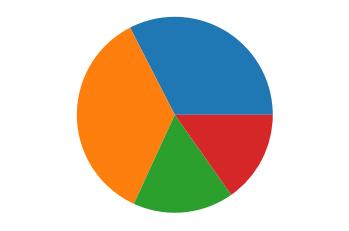

In [2]:
import csv
import matplotlib.pyplot as plt

f = open('subwayfee.csv')
data = csv.reader(f)
next(data)
label = ['유임승차', '유임하차', '무임승차', '무임하차']

for row in data:
    for i in range(4, 8):
        row[i] = int(row[i]) # 필요한 데이터를 정수로 변환
        
# 원래는 for문 안에 넣어서 모든 역에 대한 파이차트를 출력하는 것이나 하나의 차트만 보이기 위해 밖에서 하나만 출력. 
plt.pie(row[4:8])
plt.axis('equal')
plt.show()

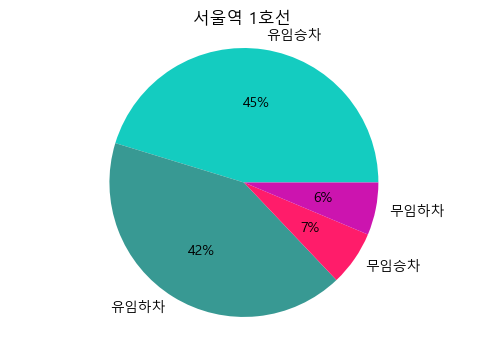

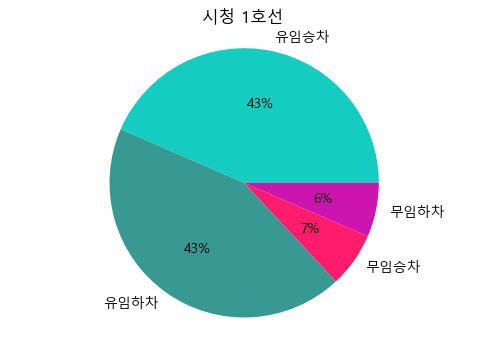

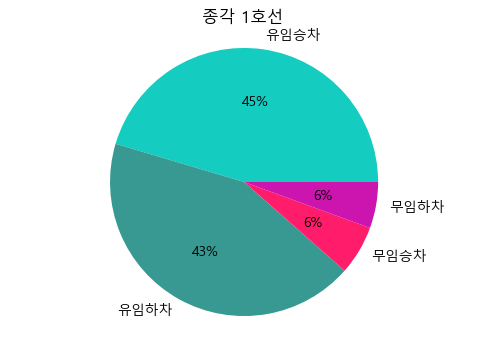

In [6]:
import csv
import matplotlib.pyplot as plt

f = open('subwayfee.csv')
data = csv.reader(f)
next(data)
label = ['유임승차', '유임하차', '무임승차', '무임하차']
c = ['#14CCC0', '#389993', '#FF1C6A', '#CC14AF']
count = 0

for row in data:
    for i in range(4, 8):
        row[i] = int(row[i]) # 필요한 데이터를 정수로 변환
        
    plt.rc('font', family='Malgun Gothic') ##
    plt.rcParams['axes.unicode_minus'] = False ##
    plt.figure(dpi=100)
    plt.title(row[3]+' '+row[1])
    plt.pie(row[4:8], labels=label, colors=c, autopct='%1.f%%')
    plt.axis('equal')
    plt.show()
    count+=1
    if count == 3:
        break        

해당 파이 차트를 이미지 파일로 저장한다.

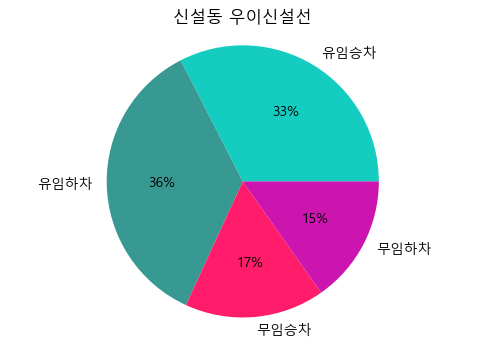

In [5]:
import csv
import matplotlib.pyplot as plt

f = open('subwayfee.csv')
data = csv.reader(f)
next(data)
label = ['유임승차', '유임하차', '무임승차', '무임하차']
c = ['#14CCC0', '#389993', '#FF1C6A', '#CC14AF']

for row in data:
    for i in range(4, 8):
        row[i] = int(row[i]) # 필요한 데이터를 정수로 변환
        
plt.rc('font', family='Malgun Gothic') ##
plt.rcParams['axes.unicode_minus'] = False ##
plt.figure(dpi=100)
plt.title(row[3]+' '+row[1])
plt.pie(row[4:8], labels=label, colors=c, autopct='%1.f%%')
plt.axis('equal')
# plt.savefig(row[3]+' '+row[1]+'.png') << 해당 명령을 실행하면 이미지 파일로 저장된다. 
plt.show()

#### (5) 지하철 시간대별 데이터 시각화하기
- 출근 시간대 사람들이 가장 많이 타고 내리는 역은 어디일까?
- 지하철 시간대별로 가장 많은 사람이 승하차 하는 역은 어디일까?

In [10]:
import csv
import matplotlib.pyplot as plt

f = open('subwaytime.csv')
data = csv.reader(f)
next(data)
next(data)
count = 0

for row in data:
    print(row)
    count +=1 
    if count==3:
        break

['Jan-19', '1호선', '150', '서울역', '927', '22', '10,682', '8,774', '13,504', '45,545', '39,110', '103,863', '80,492', '236,747', '61,108', '163,026', '68,446', '86,198', '89,100', '80,051', '98,021', '85,869', '101,282', '91,792', '86,627', '86,386', '113,919', '87,211', '118,223', '91,594', '161,216', '98,032', '249,973', '105,075', '142,575', '77,807', '97,729', '55,056', '96,955', '46,680', '70,982', '35,481', '33,149', '19,442', '3,612', '7,167', '0', '410', '0', '0', '0', '0']
['Jan-19', '1호선', '151', '시청', '74', '0', '2,409', '4,049', '3,532', '19,241', '7,703', '66,876', '9,978', '209,349', '12,818', '88,793', '16,470', '49,343', '22,512', '45,645', '26,040', '41,405', '34,728', '46,800', '40,497', '40,429', '51,586', '34,787', '54,591', '29,029', '80,258', '28,534', '170,225', '28,331', '76,142', '15,634', '57,394', '9,141', '58,745', '8,204', '38,156', '6,345', '14,478', '4,079', '981', '1,256', '3', '29', '0', '0', '0', '0']
['Jan-19', '1호선', '152', '종각', '100', '8', '4,409', '5

In [34]:
import csv
import matplotlib.pyplot as plt

f = open('subwaytime.csv')
data = csv.reader(f)
count = 0
next(data)
next(data)

for row in data:
    row[4:] = map(int, row[4:])
    print(row)
    count += 1
    if count == 3:
        break

# map을 사용해서 한번에 정수형으로 바꿔본다.
# 셀 서식에서 1000단위 구분기호를 없애지 않으면 int로 변환 할 때 오류 발생,,,,,,,,, 의미가 없네 -_-

['Jan-19', '1호선', '150', '서울역', 927, 22, 10682, 8774, 13504, 45545, 39110, 103863, 80492, 236747, 61108, 163026, 68446, 86198, 89100, 80051, 98021, 85869, 101282, 91792, 86627, 86386, 113919, 87211, 118223, 91594, 161216, 98032, 249973, 105075, 142575, 77807, 97729, 55056, 96955, 46680, 70982, 35481, 33149, 19442, 3612, 7167, 0, 410, 0, 0, 0, 0]
['Jan-19', '1호선', '151', '시청', 74, 0, 2409, 4049, 3532, 19241, 7703, 66876, 9978, 209349, 12818, 88793, 16470, 49343, 22512, 45645, 26040, 41405, 34728, 46800, 40497, 40429, 51586, 34787, 54591, 29029, 80258, 28534, 170225, 28331, 76142, 15634, 57394, 9141, 58745, 8204, 38156, 6345, 14478, 4079, 981, 1256, 3, 29, 0, 0, 0, 0]
['Jan-19', '1호선', '152', '종각', 100, 8, 4409, 5105, 4593, 26969, 6733, 104259, 11028, 300081, 14563, 167611, 20165, 80474, 34617, 76633, 42088, 71920, 59893, 75678, 68149, 62408, 84211, 57607, 96197, 55889, 144446, 63459, 257735, 83206, 134259, 51603, 113555, 19039, 135586, 12188, 111743, 8286, 54264, 5560, 4886, 1722, 0, 0,

#### (6) 출근 시간대에 사람들이 가장 많이 타고 내리는 역은 어디일까
먼저 아침 7시 승차 데이터의 위치를 확인해보자. 10번 인덱스에 저장되어 있다. 해당 인덱스의 데이터만을 가져온다.

In [37]:
import csv
import matplotlib.pyplot as plt

f = open('subwaytime.csv')
data = csv.reader(f)
count = 0
result = []
next(data)
next(data)

for row in data:
    row[4:] = map(int, row[4:])
    result.append(row[10])

print(len(result))
print(result)

598
[39110, 7703, 6733, 6066, 5143, 14893, 20077, 22615, 46015, 6088, 5822, 8459, 5822, 3225, 7973, 27835, 38199, 31012, 6313, 23263, 25458, 59821, 70814, 99368, 45639, 130638, 59461, 18787, 17974, 23502, 16391, 48487, 27365, 14946, 26301, 78413, 89675, 146181, 84974, 243083, 99608, 154641, 77272, 153133, 46364, 45277, 56578, 48068, 75744, 40444, 18646, 26197, 18343, 7965, 6917, 3353, 3160, 32301, 43628, 4860, 3988, 91650, 148741, 58325, 55607, 62354, 14773, 16297, 15231, 6464, 1992, 2337, 0, 5340, 25921, 27033, 24997, 17015, 13731, 16790, 28669, 8261, 27157, 36344, 15093, 8325, 25900, 3695, 25425, 21481, 38038, 22032, 23508, 26639, 49477, 101709, 59128, 108209, 141391, 127573, 54631, 92454, 88501, 52815, 33607, 17800, 5662, 7510, 10424, 5612, 6458, 12348, 18564, 5669, 11193, 13780, 4651, 49720, 78726, 3340, 6380, 12719, 21239, 19333, 31594, 42323, 9949, 24815, 39212, 15241, 47110, 44522, 37137, 89122, 28664, 89750, 19514, 28555, 71907, 42380, 77372, 43514, 16219, 48837, 9716, 9749, 21

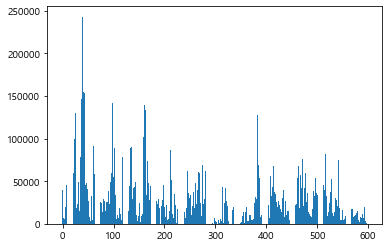

In [38]:
plt.bar(range(len(result)), result)
plt.show()

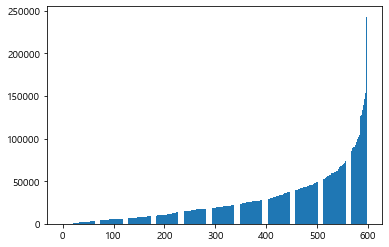

In [39]:
result.sort()
plt.bar(range(len(result)), result)
plt.show()

위의 데이터를 그래프로 그려보면 균일하지 않은 결과가 나온다. 또한 한 역이 다른 역과는 매우 큰 차이를 두고 있다는 것을 알 수 있다. 만약 여기서 출근 시간대라고 할 수 있는 7~9시까지의 승차 인원을 합쳐서 표시하면 어떻게 될까? 10번, 12번, 14번 인덱스의 값을 합쳐서 막대그래프로 표현한다.

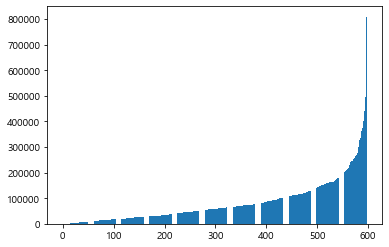

In [41]:
import csv
import matplotlib.pyplot as plt

f = open('subwaytime.csv')
data = csv.reader(f)
count = 0
result = []
next(data)
next(data)

for row in data:
    row[4:] = map(int, row[4:])
    result.append(sum(row[10:15:2]))

result.sort()
plt.bar(range(len(result)), result)
plt.show()

거의 비슷한 결과가 나온다. 그렇다면 가장 많이 들어오는 역은 어디일까?

In [43]:
import csv
import matplotlib.pyplot as plt

f = open('subwaytime.csv')
data = csv.reader(f)
count = 0
result = []
next(data)
next(data)
mx = 0
mx_station = ''

for row in data:
    row[4:] = map(int, row[4:])
    if sum(row[10:15:2]) > mx:
        mx = sum(row[10:15:2])
        mx_station = row[3] + '(' + row[1] + ')'
    # result.append(sum(row[10:15:2]))

print(mx_station, mx)

신림(2호선) 809541


그렇다면 가장 많이 하차하는 역은 어디일까? 코드를 일부분만 수정하면 된다.

In [47]:
import csv
import matplotlib.pyplot as plt

f = open('subwaytime.csv')
data = csv.reader(f)
count = 0
result = []
next(data)
next(data)
mx = 0
a = 0
mx_station = ''


for row in data:
    row[4:] = map(int, row[4:])
    a = sum(row[11:16:2]) ## 문법 
    if a > mx:
        mx = a
        mx_station = row[3] + '(' + row[1] + ')'

print(mx_station, mx)

강남(2호선) 984427


#### (!) 파이썬 문법 짚고 넘어가기: 리스트 슬라이스
> a[2:8:3]    # 인덱스 2부터 3씩 증가시키면서 인덱스 7까지 가져온다.

#### (7) 밤 11시에 사람들이 가장 많이 타는 역은 어디일까
- 밤 11시에 사람들이 가장 많이 타는 역은? 인덱스를 찾아보자. 해당 데이터에는 시간마다 승차, 하차가 있으며 승차의 시작시간 4시부터 시작한다는 걸 알 수 있다. 
- 승차 시각(t)과 승차 인원이 적힌 인덱스(i) 값의 관계를 분석하면 i = 4 + (t-4)*2 라는 패턴을 찾을 수 있다.

In [48]:
import csv
import matplotlib.pyplot as plt

f = open('subwaytime.csv')
data = csv.reader(f)
count = 0
result = []
next(data)
next(data)
mx = 0
mx_station = ''
t = int(input('몇 시의 승차 인원이 가장 많은 역이 궁금하세요?: '))

for row in data:
    row[4:] = map(int, row[4:])
    a = row[4+(t-4)*2]
    if a > mx:
        mx = a
        mx_station = row[3] + '(' + row[1] + ')'

print(mx_station, mx)

몇 시의 승차 인원이 가장 많은 역이 궁금하세요?: 23
강남(2호선) 145504


#### (8) 시간대별로 사람들이 가장 많이 타고 내리는 역은?
- 첫번째로 사람들이 가장 많이 승차하는 역을 구한다. 
- 최대 값과 역을 저장하는 변수를 24개(24시) 저장하는 리스트로 만들고 수식을 계산한다. 시간을 따지면 j는 0~23까지 증가하고 i는 4부터 시작한다. i = j*2 + 4 라는 수식이 나온다. 이 수식에 따라서 저장하면 해당 시간마다 가장 사람이 많이 타고 내리는 역 명과 사람 수가 나온다.

In [59]:
import csv
import matplotlib.pyplot as plt

f = open('subwaytime.csv')
data = csv.reader(f)
next(data)
next(data)
mx_station = ['']*24
mx = [0]*24

for row in data:
    row[4:] = map(int, row[4:])
    for j in range(24):
        a = row[j*2+4]
        if a> mx[j]:
            mx[j] = a
            mx_station[j] = row[3]+'('+str(j+4)+'시)'
            
print(mx_station)
print(mx)

['구로(4시)', '홍대입구(5시)', '신림(6시)', '신림(7시)', '신림(8시)', '신림(9시)', '신림(10시)', '신림(11시)', '강남(12시)', '강남(13시)', '강남(14시)', '강남(15시)', '강남(16시)', '강남(17시)', '강남(18시)', '강남(19시)', '강남(20시)', '강남(21시)', '강남(22시)', '강남(23시)', '강남(24시)', '강남(25시)', '성신여대입구(돈암)(26시)', '신방화(27시)']
[8418, 42966, 80407, 243083, 355172, 211286, 113830, 98765, 126159, 170216, 169097, 203483, 227268, 291623, 431115, 292521, 235489, 295326, 314609, 145504, 27203, 36, 3, 1]


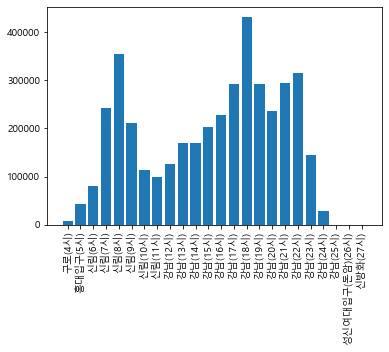

In [60]:
plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False
plt.bar(range(24), mx)
plt.xticks(range(24), mx_station, rotation=90)
plt.show()

다음으로 하차 인원이 가장 많은 역을 찾는다. 하차의 인덱스는 5부터 시작하므로 수식을 조금 수정한다.

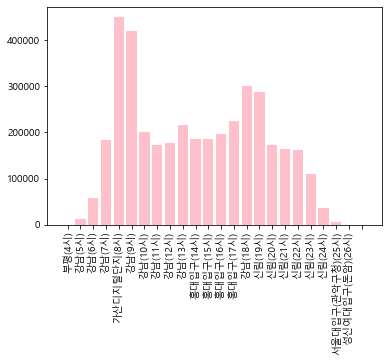

In [62]:
import csv
import matplotlib.pyplot as plt

f = open('subwaytime.csv')
data = csv.reader(f)
next(data)
next(data)
mx_station = ['']*24
mx = [0]*24

for row in data:
    row[4:] = map(int, row[4:])
    for j in range(24):
        b = row[5+ j*2] ## 하차는 인덱스가 5부터 시작한다. 
        if b > mx[j]:
            mx[j] = b
            mx_station[j] = row[3]+'('+str(j+4)+'시)'
            
plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False
plt.bar(range(24), mx, color='pink')
plt.xticks(range(24), mx_station, rotation=90)
plt.show()

지금까지는 사람들이 '가장 많이' 타고 내리는 역이 어디이며, 시간대는 언제인지를 살펴보았다. 만약 모든 지하철역에서 시간대별 승하차 인원을 모두 더하면 어떤 결과를 볼 수 있을까?

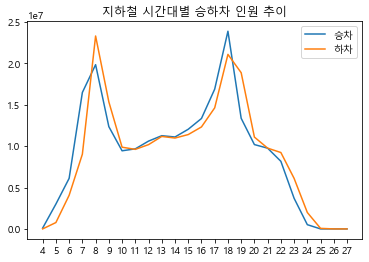

In [67]:
import csv
import matplotlib.pyplot as plt

f = open('subwaytime.csv')
data = csv.reader(f)
next(data)
next(data)
s_in = [0]*24 # 승차 인원을 저장 할 리스트
s_out = [0]*24 # 하차 인원을 저장 할 리스트

for row in data:
    row[4:] = map(int, row[4:])
    for j in range(24):
        s_in[j] += row[4+ j*2] ## 승차는 인덱스가 4부터 시작한다. (5열부터 시작하기 때문)
        s_out[j] += row[5+ j*2] ## 하차는 인덱스가 5부터 시작한다. (6열부터 시작하기 때문)
            
plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False
plt.title('지하철 시간대별 승하차 인원 추이')
plt.plot(s_in, label='승차')
plt.plot(s_out, label='하차')
plt.legend()
plt.xticks(range(24), range(4,28))
plt.show()